In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

In [45]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 96FF-6D42

 Directory of C:\Users\radhi\Desktop\Assignments of Radhika\SLR

02-01-2023  17:53    <DIR>          .
30-12-2022  10:51    <DIR>          ..
03-12-2022  16:53    <DIR>          .ipynb_checkpoints
05-12-2022  10:41               194 delivery_time.csv
02-01-2023  17:53            92,631 Delivery_Time.ipynb
03-12-2022  13:40               318 Problem_statements.txt
03-12-2022  13:40               454 Salary_Data.csv
04-12-2022  23:07           103,523 SLR_Salary.ipynb
               5 File(s)        197,120 bytes
               3 Dir(s)  77,064,499,200 bytes free


In [46]:
Delivery=pd.read_csv("delivery_time.csv")

In [47]:
Delivery.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Data Understanding

In [48]:
Delivery.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


In [49]:
Delivery.isna().sum()

DeliveryTime    0
SortingTime     0
dtype: int64

In [50]:
Delivery.dtypes

DeliveryTime    float64
SortingTime       int64
dtype: object

In [51]:
Delivery.shape

(21, 2)

In [52]:
Delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [53]:
Delivery.duplicated().sum()

0

# EDA and Visualization

<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

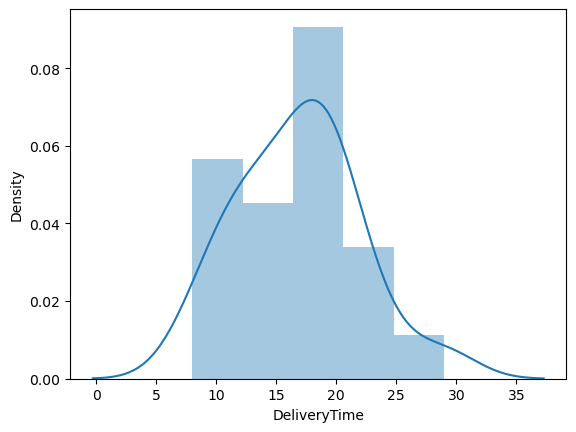

In [78]:
sns.distplot(Delivery['DeliveryTime'])

# Done with all the EDA, now we will build the Model

# Creating model with statsmodel 

In [54]:
Delivery.columns

Index(['DeliveryTime', 'SortingTime'], dtype='object')

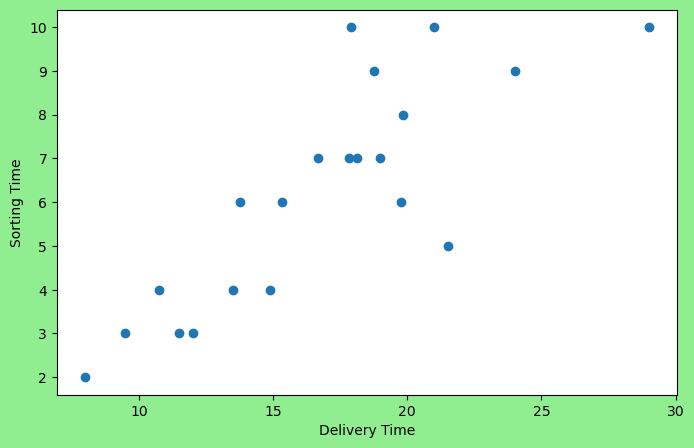

In [55]:
plt.figure(figsize=(8,5),facecolor="LightGreen")
plt.scatter(Delivery.DeliveryTime,Delivery.SortingTime)
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.show()

In [56]:
Delivery.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


In [82]:
Delivery

,DeliveryTime,SortingTime,SortingTime_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [83]:
first_model=smf.ols("DeliveryTime~SortingTime",data=Delivery).fit()

In [84]:
first_model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [60]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        17:53:53   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7567      1.134     -0.667      0.513      -3.130       1.617
DeliveryTime     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
first_model.resid

0     2.068057
1    -0.828866
2    -1.414763
3    -0.173174
4    -1.241892
5     0.405709
6    -0.104456
7    -0.173891
8     3.350662
9     1.998980
10    0.552137
11    0.308929
12    0.855430
13   -1.001378
14   -1.220662
15   -1.399832
16    1.067698
17    0.263776
18   -0.553276
19    0.379624
20   -3.138815
dtype: float64

In [62]:
first_model.predict()

array([ 7.93194282,  4.82886561,  7.41476329,  9.17317371, 11.24189185,
        5.59429132,  7.10445557,  3.1738911 ,  6.64933758,  7.00101966,
        7.44786278,  3.69107064,  6.14457035,  4.00137836,  4.22066248,
        5.39983182,  4.93230152,  6.73622374,  2.55327566,  6.62037552,
        8.13881464])

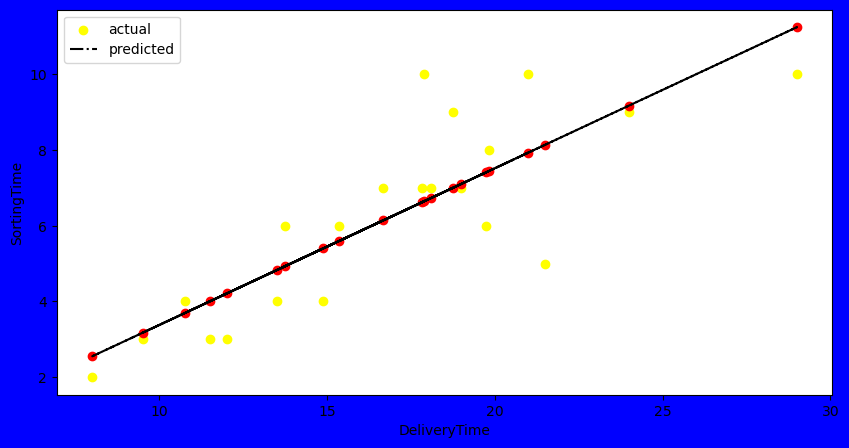

In [63]:
plt.figure(figsize=(10,5),facecolor="blue")
plt.scatter(Delivery.DeliveryTime,Delivery.SortingTime,color="yellow",label="actual")
plt.plot(Delivery.DeliveryTime,first_model.predict(),color="black",label="predicted",linestyle="-.");
plt.scatter(Delivery.DeliveryTime,first_model.predict(),color="red")
plt.xlabel("DeliveryTime");
plt.ylabel("SortingTime")
plt.xlim()
plt.ylim()
plt.legend(loc="best")
plt.show()

# Doing Log Transformation

In [64]:
second_model=smf.ols('DeliveryTime~np.log(SortingTime)',data=Delivery).fit()
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        17:53:55   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Doing Exponential Transformation

In [65]:
third_model=smf.ols('np.log(DeliveryTime)~(SortingTime)',data=Delivery).fit()
third_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Mon, 02 Jan 2023   Prob (F-statistic):           1.59e-06
Time:                          17:53:56   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
third_model.params

Intercept      2.121372
SortingTime    0.105552
dtype: float64

In [67]:
third_model.predict()

array([3.17688783, 2.54357825, 2.75468144, 3.07133624, 3.17688783,
       2.75468144, 2.86023304, 2.43802665, 3.17688783, 3.07133624,
       2.96578464, 2.54357825, 2.86023304, 2.43802665, 2.43802665,
       2.54357825, 2.75468144, 2.86023304, 2.33247505, 2.86023304,
       2.64912984])

# Doing SquareTransformation

In [70]:
Delivery['SortingTime_sq']=Delivery.SortingTime**2
fourth_model=smf.ols('DeliveryTime~SortingTime+SortingTime_sq',data=Delivery).fit()

In [71]:
fourth_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           2.39e-05
Time:                        17:54:37   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.5222      4.160      0.847      0.408      -5.217      12.261
SortingTime        2.8130      1.461      1.926      0.070      -0.256       5.882
SortingTime_sq    -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
fourth_model.params

Intercept         3.522234
SortingTime       2.813002
SortingTime_sq   -0.093198
dtype: float64

In [73]:
fourth_model.predict()

array([22.33242955, 13.28306918, 17.04510832, 21.29019387, 22.33242955,
       17.04510832, 18.64653326, 11.12245499, 22.33242955, 21.29019387,
       20.06156177, 13.28306918, 18.64653326, 11.12245499, 11.12245499,
       13.28306918, 17.04510832, 18.64653326,  8.77544437, 18.64653326,
       15.25728696])

In [38]:
final_model=third_model
final_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Mon, 02 Jan 2023   Prob (F-statistic):           1.59e-06
Time:                          17:50:05   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
final_model.params

Intercept      2.121372
SortingTime    0.105552
dtype: float64

In [75]:
final_model.predict()

array([3.17688783, 2.54357825, 2.75468144, 3.07133624, 3.17688783,
       2.75468144, 2.86023304, 2.43802665, 3.17688783, 3.07133624,
       2.96578464, 2.54357825, 2.86023304, 2.43802665, 2.43802665,
       2.54357825, 2.75468144, 2.86023304, 2.33247505, 2.86023304,
       2.64912984])